In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
time = pd.read_csv("time.csv")
t_a = time.iloc[0:3, :]
t_b = time.iloc[3:6, :]
t_c = time.iloc[6:9, :]
t_a.head()

,t_900,t_800,t_700,t_600,t_500,t_400,t_300,t_200
0,7.48,10.10,12.79,15.38,17.91,20.73,23.37,25.95
1,8.49,11.12,13.84,16.44,19.07,21.85,24.55,27.49
2,5.98,8.59,11.28,13.82,16.45,19.35,21.84,24.70


In [3]:
delta_L = 3e-2
s_i = [0.0385 + (1 + i) * delta_L for i in range(0, 8, 1)]
s_0 = 0.0385 + 1 * delta_L
s_i, s_0

([0.0685, 0.0985, 0.1285, 0.1585, 0.1885, 0.2185, 0.2485, 0.27849999999999997],
 0.0685)

# 拟合 v_f

In [4]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['font.size'] = '14'

In [5]:
t_as = []
t_bs = []
t_cs = []
for i in range(3):
    t_as.append(t_a.iloc[i, :].to_numpy())
    t_bs.append(t_b.iloc[i, :].to_numpy())
    t_cs.append(t_c.iloc[i, :].to_numpy())
    
    
x_label = ["t_900", "t_800", "t_700", "t_600", "t_500", "t_400", "t_300", "t_200"]

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
t_cs[0]

array([ 3.45,  4.35,  5.26,  6.23,  7.23,  8.18,  9.16, 10.16])

In [8]:
v_f_as = []
v_f_a_legend = []

for i in range(3):
    linear_fit = LinearRegression()
    linear_fit.fit(
        X=np.array(t_as[i]).reshape((-1, 1)),
        y=s_i
        )
    v_f_as.append(linear_fit.coef_[0])
    v_f_a_legend.append(str("y = ") + str(np.round(linear_fit.coef_[0], 4)) + str("(x - ") + str(t_as[i][0]) + str(")") + "+ " + str(s_0))

v_f_as, v_f_a_legend

([0.011350969859218192, 0.011108031577970872, 0.011241164472560412],
 ['y = 0.0114(x - 7.48)+ 0.0685',
  'y = 0.0111(x - 8.49)+ 0.0685',
  'y = 0.0112(x - 5.98)+ 0.0685'])

In [9]:
v_f_bs = []
v_f_b_legend = []

for i in range(3):
    linear_fit = LinearRegression()
    linear_fit.fit(
        X=np.array(t_bs[i]).reshape((-1, 1)),
        y=s_i
        )
    v_f_bs.append(linear_fit.coef_[0])
    v_f_b_legend.append(str("y = ") + str(np.round(linear_fit.coef_[0], 4)) + str("(x - ") + str(t_bs[i][0]) + str(")") + "+ " + str(s_0))

v_f_bs, v_f_b_legend

([0.020420075161588586, 0.02127056816745734, 0.021036557517957893],
 ['y = 0.0204(x - 4.98)+ 0.0685',
  'y = 0.0213(x - 4.7)+ 0.0685',
  'y = 0.021(x - 4.38)+ 0.0685'])

In [10]:
v_f_cs = []
v_f_c_legend = []

for i in range(3):
    linear_fit = LinearRegression()
    linear_fit.fit(
        X=np.array(t_cs[i]).reshape((-1, 1)),
        y=s_i
        )
    v_f_cs.append(linear_fit.coef_[0])
    v_f_c_legend.append(str("y = ") + str(np.round(linear_fit.coef_[0], 4)) + str("(x - ") + str(t_cs[i][0]) + str(")") + "+ " + str(s_0))

v_f_cs, v_f_c_legend

([0.031187623787223027, 0.031243260137076696, 0.0324108290446561],
 ['y = 0.0312(x - 3.45)+ 0.0685',
  'y = 0.0312(x - 3.35)+ 0.0685',
  'y = 0.0324(x - 3.5)+ 0.0685'])

In [11]:
X_line = np.linspace(0, 8, 50)
y = v_f_as[0] * X_line + s_0

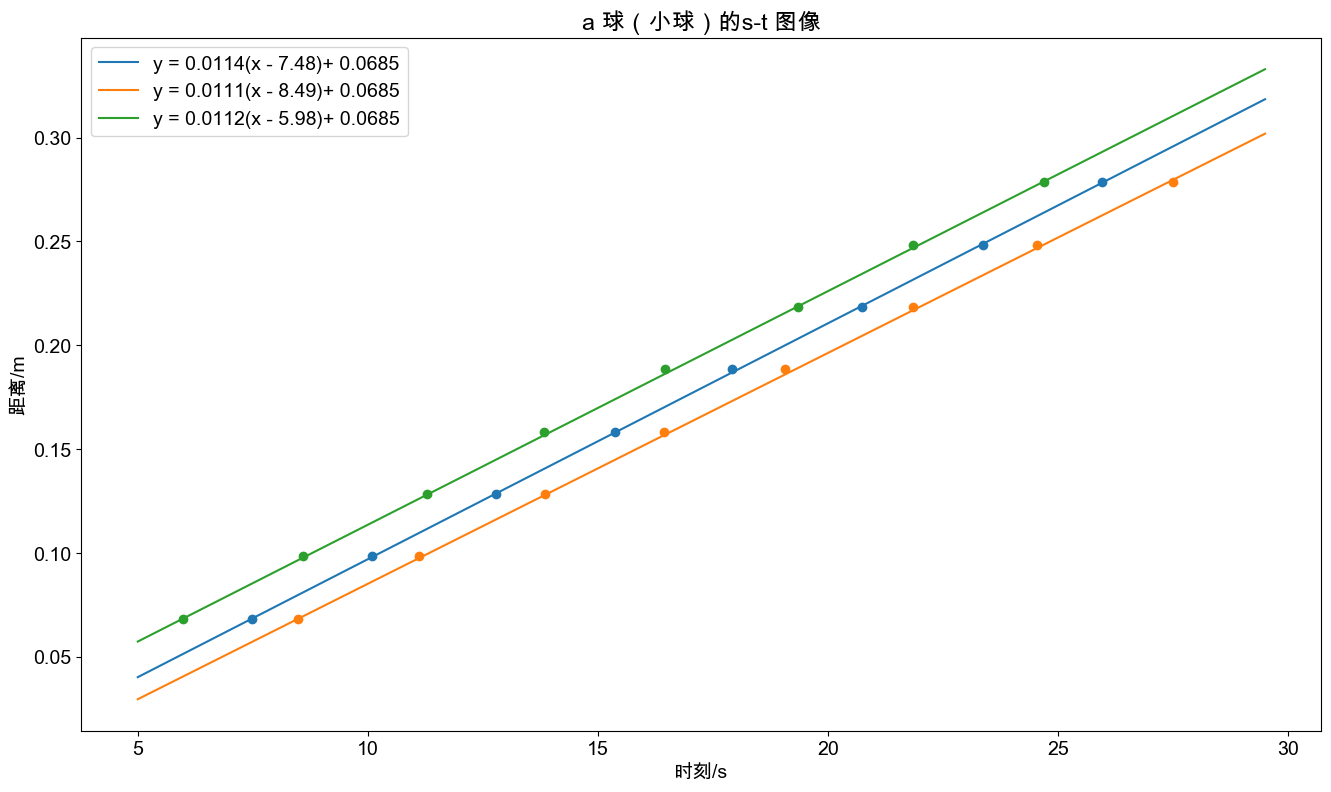

In [12]:
X_line = np.arange(5, 30, 0.5)

plt.figure(figsize=(16,9))
plt.title("a 球（小球）的s-t 图像")

plt.plot(X_line, v_f_as[0] * (X_line - t_as[0][0]) + s_0)
plt.plot(X_line, v_f_as[1] * (X_line - t_as[1][0]) + s_0)
plt.plot(X_line, v_f_as[2] * (X_line - t_as[2][0]) + s_0)

plt.legend(v_f_a_legend)

plt.scatter(t_as[0], s_i, marker='o')
plt.scatter(t_as[1], s_i, marker='o')
plt.scatter(t_as[2], s_i, marker='o')

plt.xlabel("时刻/s")
plt.ylabel("距离/m")


plt.show()

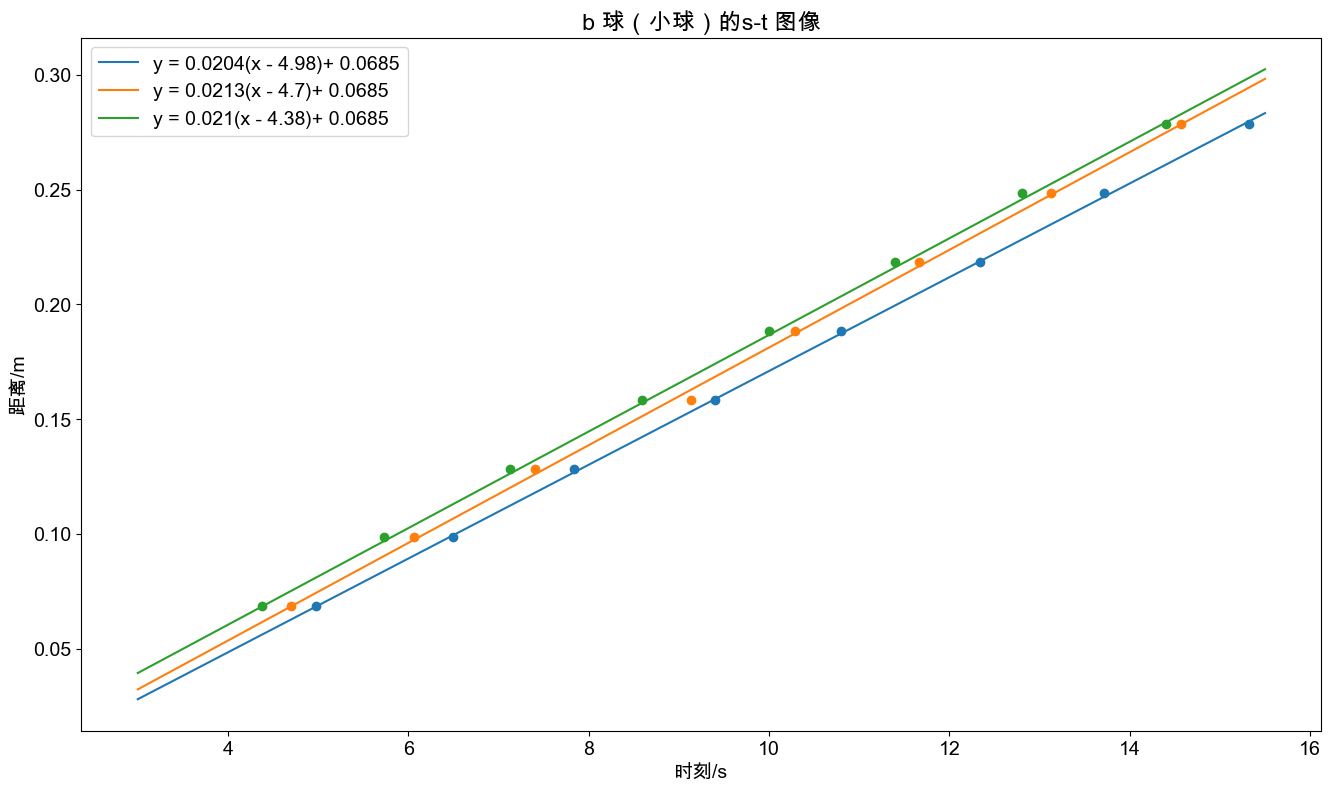

In [13]:
X_line = np.arange(3, 16, 0.5)

plt.figure(figsize=(16, 9))
plt.title("b 球（小球）的s-t 图像")

plt.plot(X_line, v_f_bs[0] * (X_line - t_bs[0][0]) + s_0)
plt.plot(X_line, v_f_bs[1] * (X_line - t_bs[1][0]) + s_0)
plt.plot(X_line, v_f_bs[2] * (X_line - t_bs[2][0]) + s_0)

plt.legend(v_f_b_legend)

plt.scatter(t_bs[0], s_i, marker='o')
plt.scatter(t_bs[1], s_i, marker='o')
plt.scatter(t_bs[2], s_i, marker='o')

plt.xlabel("时刻/s")
plt.ylabel("距离/m")


plt.show()

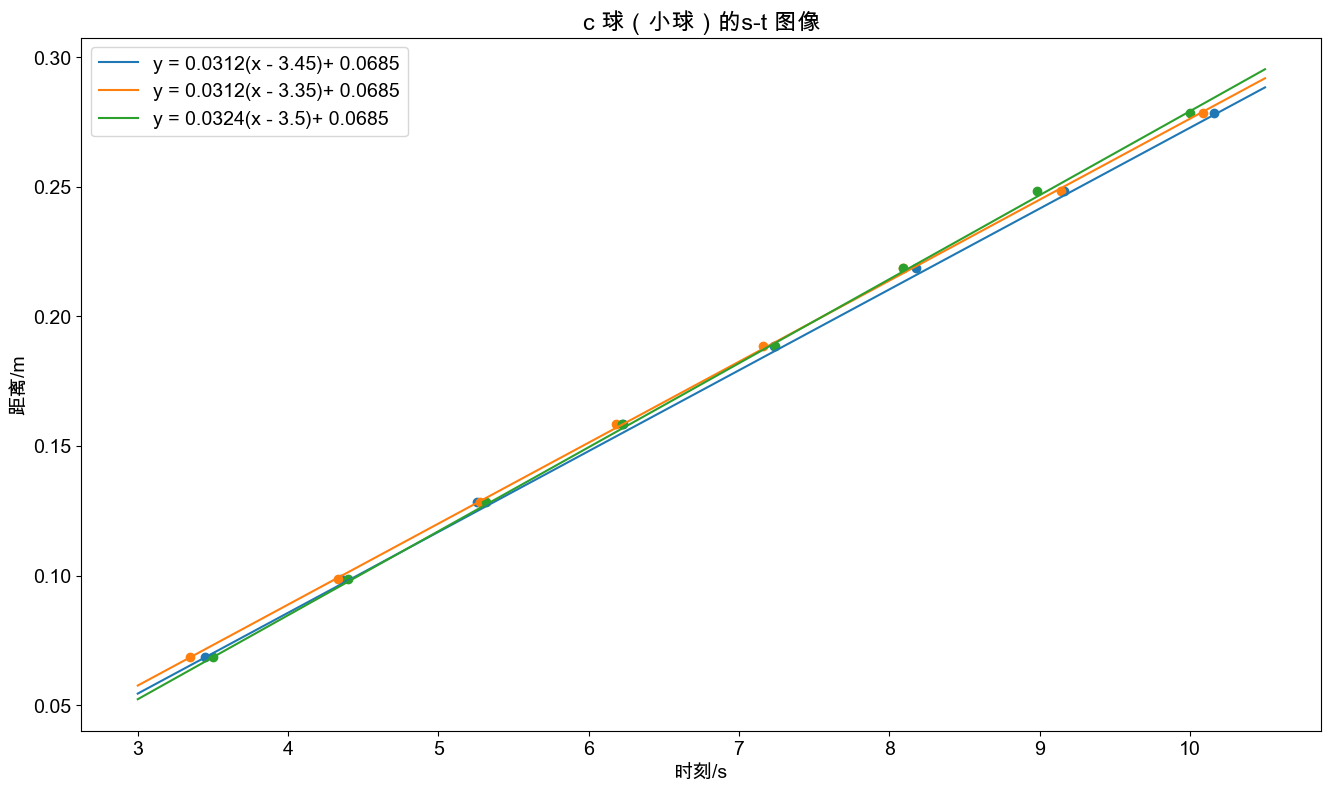

In [14]:
X_line = np.arange(3, 11, 0.5)

plt.figure(figsize=(16, 9))
plt.title("c 球（小球）的s-t 图像")

plt.plot(X_line, v_f_cs[0] * (X_line - t_cs[0][0]) + s_0)
plt.plot(X_line, v_f_cs[1] * (X_line - t_cs[1][0]) + s_0)
plt.plot(X_line, v_f_cs[2] * (X_line - t_cs[2][0]) + s_0)

plt.legend(v_f_c_legend)

plt.scatter(t_cs[0], s_i, marker='o')
plt.scatter(t_cs[1], s_i, marker='o')
plt.scatter(t_cs[2], s_i, marker='o')

plt.xlabel("时刻/s")
plt.ylabel("距离/m")
plt.show()

In [21]:
def eta(phi: float, rho: float, rho_0: float, 
        g: float, v_f: float, D: float, H: float):
    k1 = 1 + 2.4 * phi/D
    k2 = 1 + 1.7 * phi/H
    delta_rho = rho - rho_0
    return np.power(phi, 2)*g*delta_rho/(18 * v_f * k1 * k2)

In [70]:
g = 9.7887
phi_a = 1.548e-3
phi_b = 2.008e-3
phi_c = 2.496e-3
M_a = 0.37e-3
M_b = 1.01e-3
M_c = 1.74e-3
rho_a = M_a/(5 * np.pi * np.power(phi_a, 3))
rho_b = M_b/(5 * np.pi * np.power(phi_b, 3))
rho_c = M_c/(5 * np.pi * np.power(phi_c, 3))

rho = rho_c
rho_0 = 0.96e3
D = np.mean([63.40, 63.34, 63.64]) * 1e-3
H = np.mean([33.80, 33.90]) * 1e-2
D, H, rho_a, rho_b, rho_c, rho_0

(0.06346,
 0.33849999999999997,
 6349.930588196401,
 7941.643200594788,
 7123.536078683989,
 960.0)

In [63]:
v_f_a = np.mean([0.0114, 0.0111, 0.0112])
v_f_b = np.mean([0.0204, 0.0213, 0.0210])
v_f_c = np.mean([0.0312, 0.0312, 0.0324])
v_f_a, v_f_b, v_f_c

(0.011233333333333333, 0.020900000000000002, 0.031599999999999996)

In [64]:
eta_a = eta(phi_a, rho, rho_0, g, v_f_a, D, H)
eta_b = eta(phi_b, rho, rho_0, g, v_f_b, D, H)
eta_c = eta(phi_c, rho, rho_0, g, v_f_c, D, H)
eta_a, eta_b, eta_c

(0.6711921974124246, 0.5958279653855589, 0.5967221143917398)

In [65]:
def Re(v, rho, phi, eta):
    return v * rho * phi / eta

In [66]:
Re(v_f_a, rho_0, phi_a, eta_a), Re(v_f_b, rho_0, phi_b, eta_b), Re(v_f_c, rho_0, phi_c, eta_c)

(0.02487161213190077, 0.06761769225438989, 0.12684014581418987)